In [5]:
import pandas as pd
import numpy as np
air = pd.read_csv('airquality.csv')
air.columns.to_list()
air.head()
air.shape

(153, 7)

In [6]:
air.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
air.isnull().sum()
A = air.fillna(method='pad')
A = air.fillna(method='backfill')

In [8]:
A = air['Ozone'].replace(np.NaN,air['Ozone'].mean())
A = air['Ozone'].replace(np.NaN,air['Ozone'].median())
A = air['Ozone'].replace(np.NaN,air['Ozone'].mode()[0])

In [ ]:
air.dropna(inplace=True)

In [9]:
from sklearn.impute import SimpleImputer
# Create a SimpleImputer object with the desired strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')
# Fit the imputer to the dataset and transform the missing values
air_imputed = imputer.fit_transform(air)
# Convert the imputed data back into a DataFrame
air_imputed_df = pd.DataFrame(air_imputed, columns=air.columns)
# Check the updated DataFrame
air_imputed_df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0


In [10]:
columns_to_transform = ['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day']

In [11]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()
# Apply StandardScaler transformation to the selected columns
air_standard_scaled = scaler.fit_transform(air[columns_to_transform])
# Convert the scaled data into a DataFrame
air_standard_scaled_df = pd.DataFrame(air_standard_scaled, columns=columns_to_transform)
# Describe the StandardScaler DataFrame
air_standard_scaled_df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,1.160000e+02,1.460000e+02,1.530000e+02,1.530000e+02,153.000000,1.530000e+02
mean,-3.062684e-17,-4.866731e-17,-2.322035e-17,7.430512e-16,0.000000,-6.966105e-17
std,1.004338e+00,1.003442e+00,1.003284e+00,1.003284e+00,1.003284,1.003284e+00
min,-1.252210e+00,-1.993678e+00,-2.351584e+00,-2.319450e+00,-1.411916,-1.675504e+00
25%,-7.346331e-01,-7.819712e-01,-7.283322e-01,-6.235080e-01,-0.703643,-8.832458e-01
50%,-3.236165e-01,2.124636e-01,-7.333578e-02,1.184665e-01,0.004629,2.219211e-02
75%,6.430337e-01,8.113529e-01,4.392701e-01,7.544446e-01,0.712902,8.144503e-01
max,3.832218e+00,1.649798e+00,3.059256e+00,2.026401e+00,1.421174,1.719888e+00


In [12]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Apply MinMaxScaler transformation to the selected columns
air_minmax_scaled = scaler.fit_transform(air[columns_to_transform])
# Convert the scaled data into a DataFrame
air_minmax_scaled_df = pd.DataFrame(air_minmax_scaled, columns=columns_to_transform)
# Describe the MinMaxScaler DataFrame
air_minmax_scaled_df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,0.246283,0.547191,0.434606,0.533716,0.498366,0.493464
std,0.197532,0.275408,0.185421,0.230860,0.354131,0.295484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.101796,0.332569,0.300000,0.390244,0.250000,0.233333
50%,0.182635,0.605505,0.421053,0.560976,0.500000,0.500000
75%,0.372754,0.769878,0.515789,0.707317,0.750000,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:


from sklearn.preprocessing import Binarizer
# Create a Binarizer object with the desired threshold
binarizer = Binarizer(threshold=0.5)
# Apply Binarizer transformation to the selected columns
air_binarized = binarizer.transform(air[columns_to_transform].dropna())

# Convert the binarized data into a DataFrame
air_binarized_df = pd.DataFrame(air_binarized, columns=columns_to_transform)
# Describe the Binarizer DataFrame
air_binarized_df.describe()

c:\Users\dipan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Binarizer was fitted without feature names
  warnings.warn(


,Ozone,Solar.R,Wind,Temp,Month,Day
count,111.0,111.0,111.0,111.0,111.0,111.0
mean,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
from sklearn.linear_model import LinearRegression
# Split the data into features (X) and target variable (Y)
air.dropna(inplace=True)
X = air[['Ozone']]
Y = air['Temp']
# Create a LinearRegression model
model = LinearRegression()
# Fit the model to the data
model.fit(X, Y)

LinearRegression()

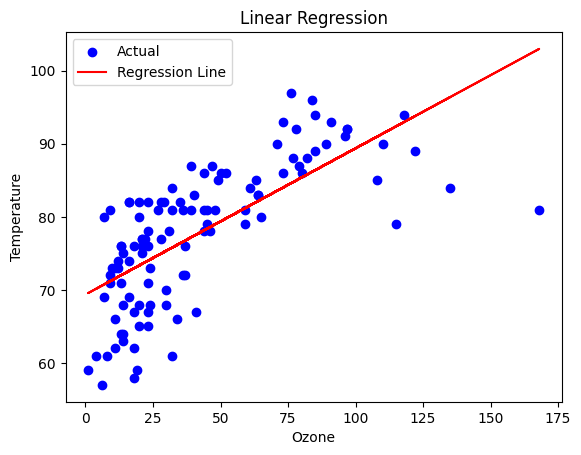

In [19]:
import matplotlib.pyplot as plt
# Make predictions on the features
predictions = model.predict(X)
# Create a scatter plot to show the original data points
plt.scatter(X['Ozone'], Y, color='blue', label='Actual')
# Plot the line representing the regression model
plt.plot(X['Ozone'], predictions, color='red',  label='Regression Line')
# Set labels and title for the plot
plt.xlabel('Ozone')
plt.ylabel('Temperature')
plt.title('Linear Regression')
# Add a legend
plt.legend()
# Show the plot
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Create a LinearRegression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Calculate the score (R-squared) on the testing data
score = model.score(X_test, y_test)
print("R-squared score:", score)

R-squared score: 0.5636519120905267
